# Multiple Linear Regression

## Aim of this case study

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. <br><br>

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

We are tasked with to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

We will work with available independent variables to understand how exactly the demands vary with different features so that management can manipulate the business strategy to meet the demand levels and meet the customer's expectations. 

We will go through following steps to acheive our business goal:
#### Steps
1. Importing and Understanding Data
1. Hypothesis Testing
1. Data Preparation
1. Building the model 
    1. Automatic Selection using REF 
    1. Fine tune with Manual Selection
1. Residual Analysis
1. Making Predictions Using the Final Model
1. Model Evaluation


## 1. Importing and Understanding Data

Importing required libraries and loading csv data into data frame

In [62]:
import numpy as np
import pandas as pd

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [2]:
# Importing day.csv 
bike = pd.read_csv("day.csv")

Now we will check basic information of data such as shape, info, description etc

In [3]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


<font color='blue'>**Observation**</font> : There are no missing values in any of the columns

In [4]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


<font color='blue'>**Observation**</font> : We have a total of 16 columns and 730 records and records are a mix of int64, float64 and object.

### 1.1 Data Cleaning
Now we need to analyze data and perform cleaning on it

Based on our observation of data and details given in data dictionary we can see that following variables are not required for our model building:
- ***instant** : It is a unique identifier for records which does not have any significance in analysis
- **dteday** : All the possible columns to extract from this columns are already present like month, day and year
- **mnth** : month of the year is kind of categories into seasons, hence dropping it we will add it back if required later
- **casual & registered** : they are subset of our traget variable/ feature. It will have unwated impact on 'cnt'

In [6]:
bike.drop(['instant','dteday','mnth','casual','registered'],axis=1,inplace=True)

In [7]:
bike.columns

Index(['season', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [8]:
bike.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
temp          498
hum           594
windspeed     649
atemp         689
cnt           695
dtype: int64

## 2. Hypothesis Testing

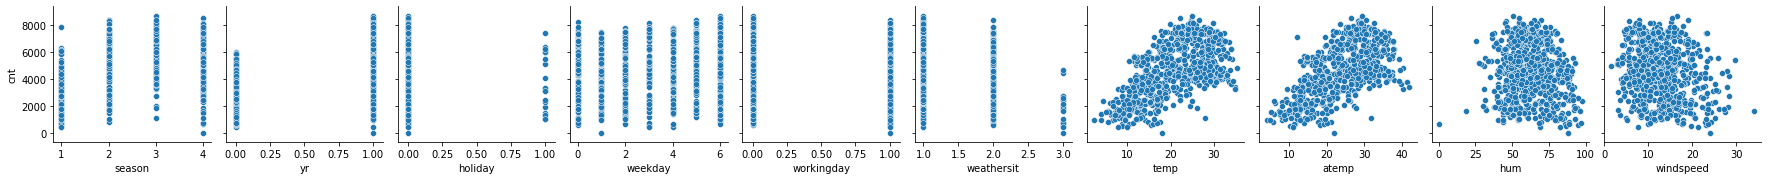

In [9]:
sns.pairplot(y_vars='cnt',x_vars=['season', 'yr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed'],data=bike)

There is some correlation between yr, temp, seasons, weathersit, atemp, windspeed and humidity. We can observe that in second year the demand increased which can help predict demand in following year. temp has possitive correlation with cnt. weathersit aslso show pattern where 3.0 is lowest <br>

<font color='blue'>**Observation**</font> : Hence we can conclude that liner regression model can be applied to this data set

## 3. Data Preparation

First we will Split the columns into categorical and numerical columns

In [10]:
bike.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
temp          498
hum           594
windspeed     649
atemp         689
cnt           695
dtype: int64

<font color='blue'>**Observation**</font> : yr, holiday, workingday, season, weathersit, weathersit and weekday are categorical columns and remaining are numerical columns

In [11]:
cat_col = ['season', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit']
num_col = [ 'temp', 'atemp', 'hum', 'windspeed', 'cnt']

### 3.1 Encoding

We observed that some columns have numerical values even when they are categrical columns like 'weathersit', 'season' and 'weekday'. We will change them to actual categorical values which will help us in filling with dummy variables

Fixing 'weathersit' and 'season' based on labels mentioned in data dictionary as follows

**weathersit** :
- 1 : clear
- 2 : mist
- 3 : light_snow_rain
- 4 : heavy_snow_rain
    
**season** :
- 1 : spring
- 2 : summer
- 3 : fall
- 4 : winter

Fixing 'weekday' as follows

**weekday** 
- 0 : tue
- 1 : wed
- 2 : thu
- 3 : fri
- 4 : sat
- 5 : sun
- 6 : mon

In [12]:
# Converting int type variables to string to use replace function in lambda function

bike.weathersit = bike.weathersit.astype('string')
bike.season = bike.season.astype('string')
bike.weekday = bike.weekday.astype('string')
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    string 
 1   yr          730 non-null    int64  
 2   holiday     730 non-null    int64  
 3   weekday     730 non-null    string 
 4   workingday  730 non-null    int64  
 5   weathersit  730 non-null    string 
 6   temp        730 non-null    float64
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), string(3)
memory usage: 62.9 KB


In [13]:
bike.weathersit = bike.weathersit.apply(lambda x : x.replace('1','clear'))
bike.weathersit = bike.weathersit.apply(lambda x : x.replace('2','mist'))
bike.weathersit = bike.weathersit.apply(lambda x : x.replace('3','light_snow_rain'))
bike.weathersit = bike.weathersit.apply(lambda x : x.replace('4','heavy_snow_rain'))

bike.season = bike.season.apply(lambda x : x.replace('1','spring'))
bike.season = bike.season.apply(lambda x : x.replace('2','summer'))
bike.season = bike.season.apply(lambda x : x.replace('3','fall'))
bike.season = bike.season.apply(lambda x : x.replace('4','winter'))

bike.weekday = bike.weekday.apply(lambda x : x.replace('0','tue'))
bike.weekday = bike.weekday.apply(lambda x : x.replace('1','wed'))
bike.weekday = bike.weekday.apply(lambda x : x.replace('2','thu'))
bike.weekday = bike.weekday.apply(lambda x : x.replace('3','fri'))
bike.weekday = bike.weekday.apply(lambda x : x.replace('4','sat'))
bike.weekday = bike.weekday.apply(lambda x : x.replace('5','sun'))
bike.weekday = bike.weekday.apply(lambda x : x.replace('6','mon'))

In [14]:
bike.weathersit.value_counts(dropna=False)

clear              463
mist               246
light_snow_rain     21
Name: weathersit, dtype: int64

In [15]:
bike.season.value_counts(dropna=False)

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [16]:
bike.weekday.value_counts(dropna=False)

mon    105
tue    105
wed    105
thu    104
sat    104
sun    104
fri    103
Name: weekday, dtype: int64

### 3.2 Data Cleaning - Outlier Processing

#### Categorical variables treatment

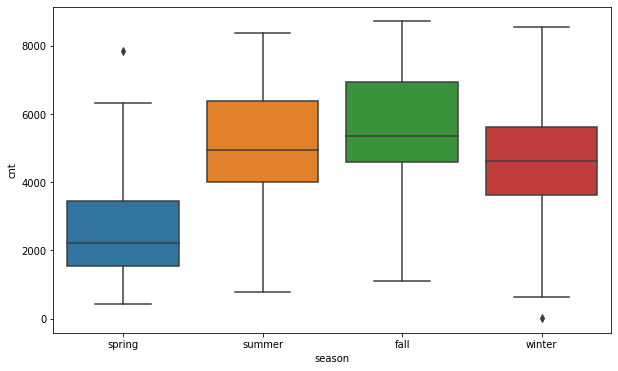

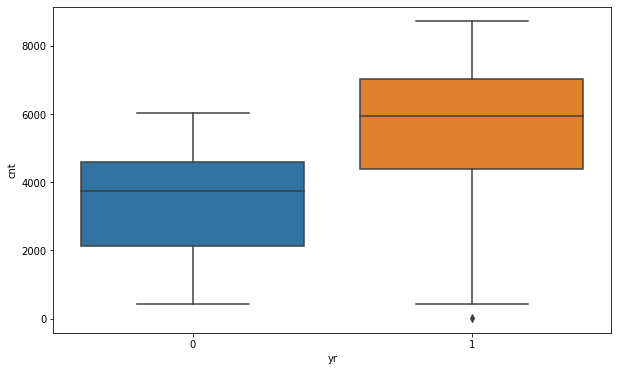

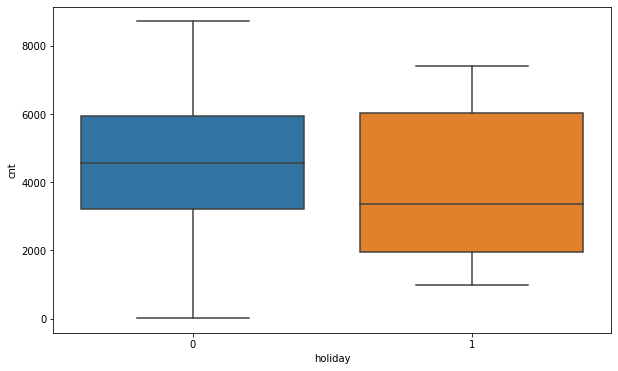

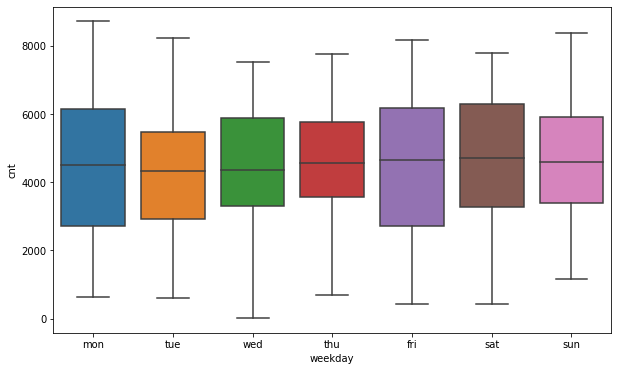

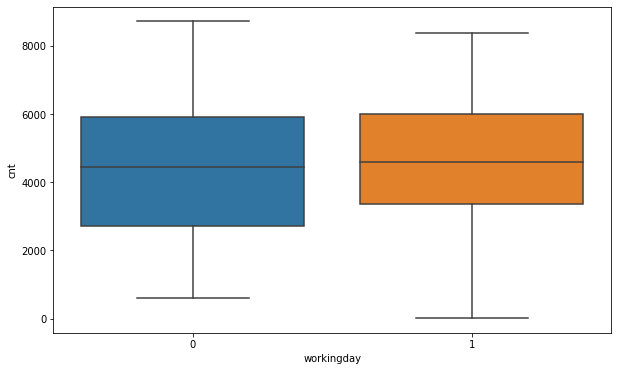

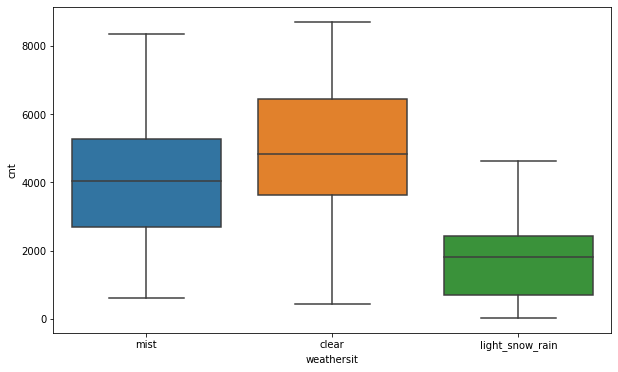

In [17]:
# Plotting all categorical variables in box plot
for col in cat_col:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y="cnt",x=col, data=bike)
    plt.show()


<font color='blue'>**Observation**</font> : It can be seen that in spring season we have some outliers which we will remove. Also we have some outliers in winter season which we will remove

In [18]:
# Removing outliers from season
bike = bike[~((bike.season=='spring') & (bike.cnt>6300))]

In [19]:
# Removing outliers from season
bike = bike[~((bike.season=='winter') & (bike.cnt<100))]

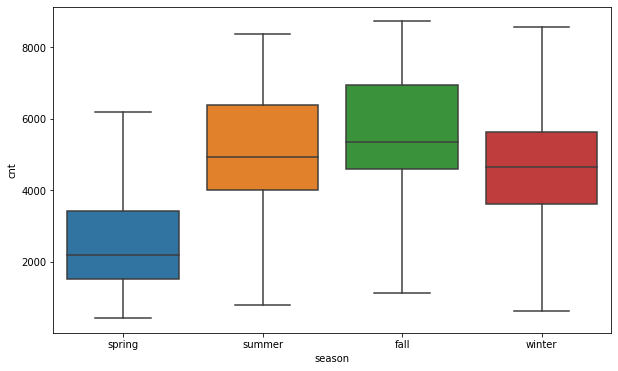

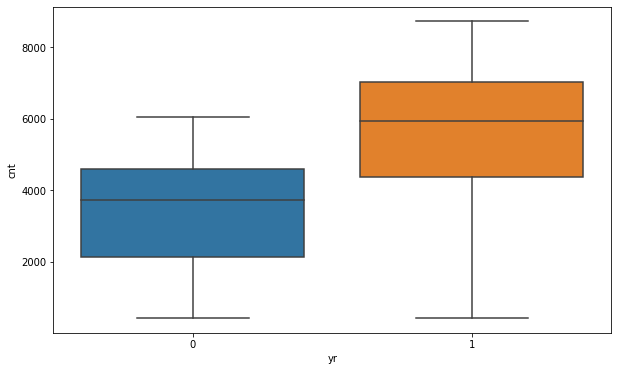

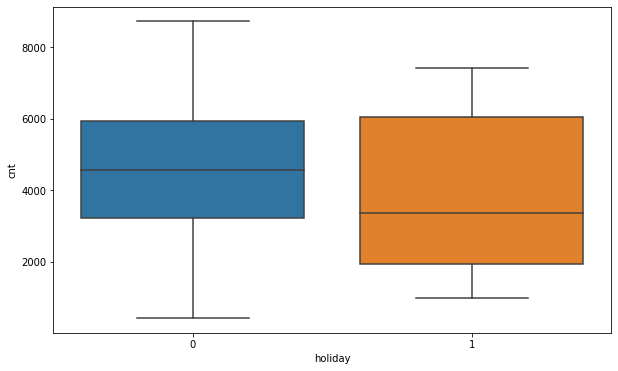

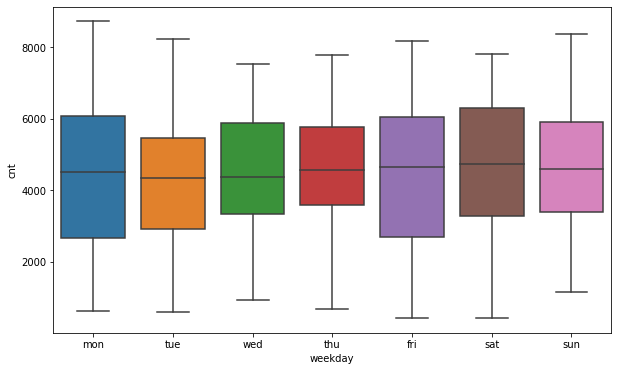

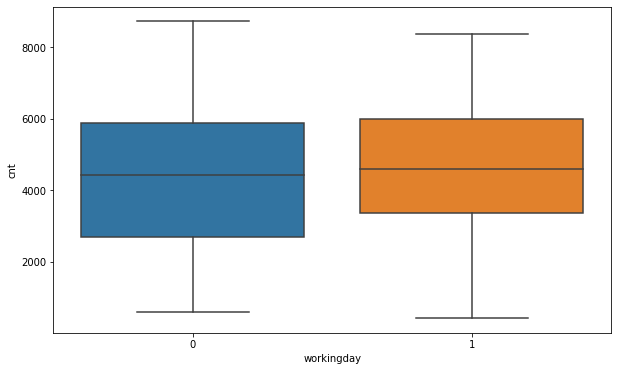

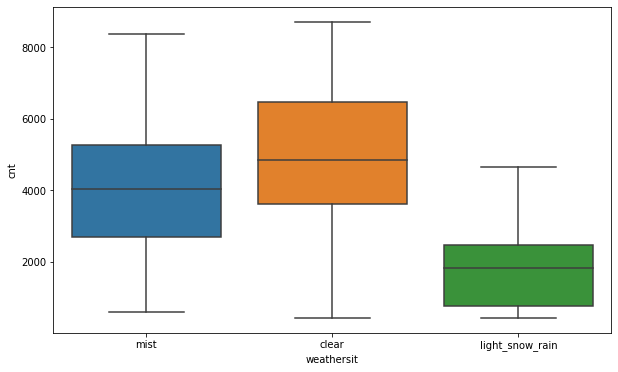

In [20]:
for col in cat_col:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y="cnt",x=col, data=bike)
    plt.show()

#### Numeric variables treatment

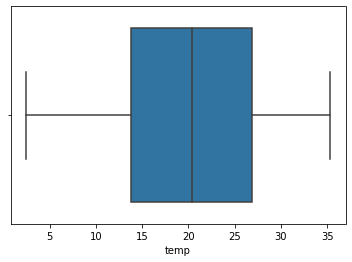

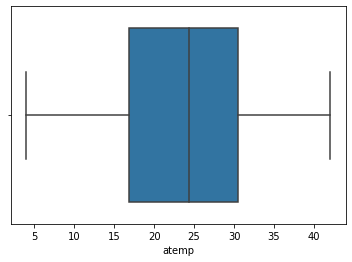

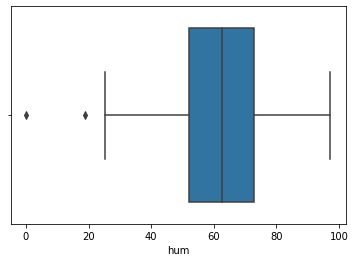

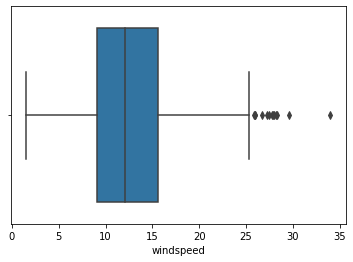

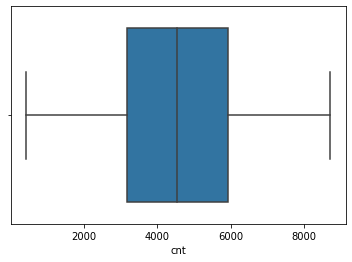

In [21]:
# Plotting all numeric variables in box plot
def box_plot(series):
    sns.boxplot(x=series)
    plt.show()


for column_name in num_col:
    box_plot(bike[column_name])

<font color='blue'>**Observation**</font> : It can be seen that in 'hum' we have some outliers which we will remove. Also we have some outliers in 'windspeed' which we will remove

In [22]:
# Removing outliers from hum
bike = bike[~(bike.hum<25)]

In [23]:
# Removing outliers from hum
bike = bike[~(bike.windspeed>25)]

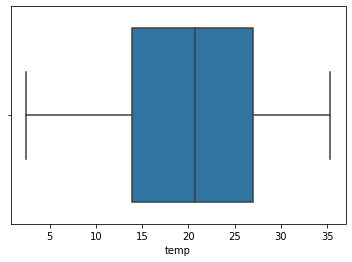

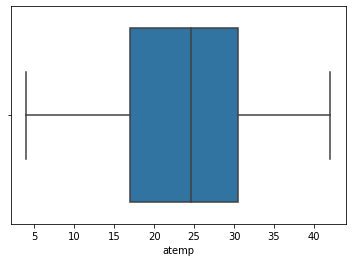

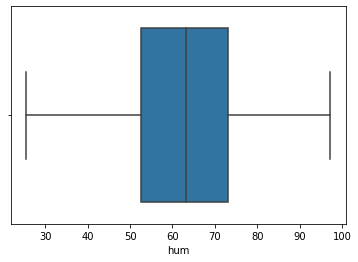

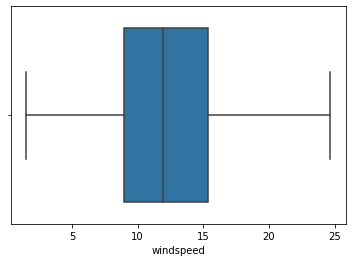

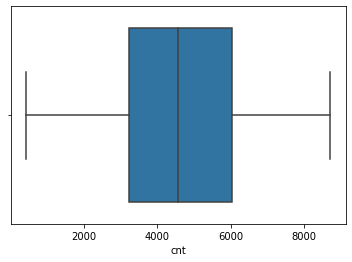

In [24]:
for column_name in num_col:
    box_plot(bike[column_name])

### 3.3 Hypothesis Validation

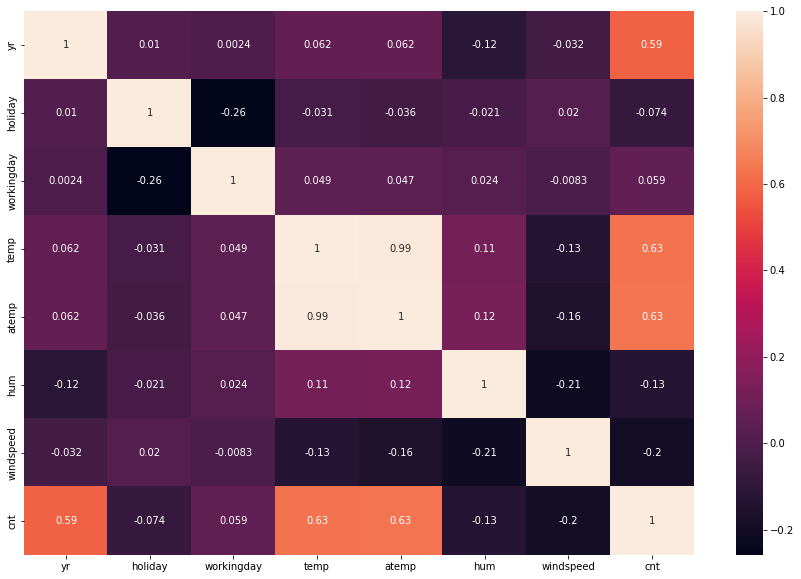

In [25]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(bike.corr(),annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

<font color='blue'>**Observation**</font> : Here we can observe that cnt have positive correlation with temp, yr and working day and negative correlation with windspeed and humidity and holiday

In [26]:
bike.head()

,season,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,0,mon,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,0,tue,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,0,thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


### 3.4 Encoding - Creating dummy variables

Convert categorical variables to dummy variables

<font color='blue'>**Observation**</font> : We have 3 variables which we need to encode to dummy variables in order to feed it to our model. The variables which needs to be encoded are as follows:
- season
- weathersit
- weekday

In [27]:
season = pd.get_dummies(bike.season,drop_first=True)
season

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [28]:
weathersit = pd.get_dummies(bike.weathersit,drop_first=True)
weathersit

,light_snow_rain,mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
725,0,1
726,0,1
727,0,1
728,0,0


In [29]:
# mnth = pd.get_dummies(bike.mnth,drop_first=True)
# mnth

In [30]:
weekday = pd.get_dummies(bike.weekday,drop_first=True)
weekday

,mon,sat,sun,thu,tue,wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
725,0,1,0,0,0,0
726,0,0,1,0,0,0
727,1,0,0,0,0,0
728,0,0,0,0,1,0


Observe that we are using 'drop_first=True' since we can represent K values of variable with K-1 columns

In [31]:
# Concating all the newly created dataframes
bike = pd.concat([bike, weathersit,season,weekday], axis=True)

In [32]:
bike

,season,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,...,mist,spring,summer,winter,mon,sat,sun,thu,tue,wed
0,spring,0,0,mon,0,mist,14.110847,18.18125,80.5833,10.749882,...,1,1,0,0,1,0,0,0,0,0
1,spring,0,0,tue,0,mist,14.902598,17.68695,69.6087,16.652113,...,1,1,0,0,0,0,0,0,1,0
2,spring,0,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,...,0,1,0,0,0,0,0,0,0,1
3,spring,0,0,thu,1,clear,8.200000,10.60610,59.0435,10.739832,...,0,1,0,0,0,0,0,1,0,0
4,spring,0,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,0,sat,1,mist,10.420847,11.33210,65.2917,23.458911,...,1,1,0,0,0,1,0,0,0,0
726,spring,1,0,sun,1,mist,10.386653,12.75230,59.0000,10.416557,...,1,1,0,0,0,0,1,0,0,0
727,spring,1,0,mon,0,mist,10.386653,12.12000,75.2917,8.333661,...,1,1,0,0,1,0,0,0,0,0
728,spring,1,0,tue,0,clear,10.489153,11.58500,48.3333,23.500518,...,0,1,0,0,0,0,0,0,1,0


In [33]:
# Dropping original variables since now they are represented in new dummy variables
bike.drop(['season','weathersit','weekday'],axis=1,inplace=True)
bike

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,light_snow_rain,mist,spring,summer,winter,mon,sat,sun,thu,tue,wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,1,0,0,1,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,1,1,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,1,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,1,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,11.33210,65.2917,23.458911,2114,0,1,1,0,0,0,1,0,0,0,0
726,1,0,1,10.386653,12.75230,59.0000,10.416557,3095,0,1,1,0,0,0,0,1,0,0,0
727,1,0,0,10.386653,12.12000,75.2917,8.333661,1341,0,1,1,0,0,1,0,0,0,0,0
728,1,0,0,10.489153,11.58500,48.3333,23.500518,1796,0,0,1,0,0,0,0,0,0,1,0


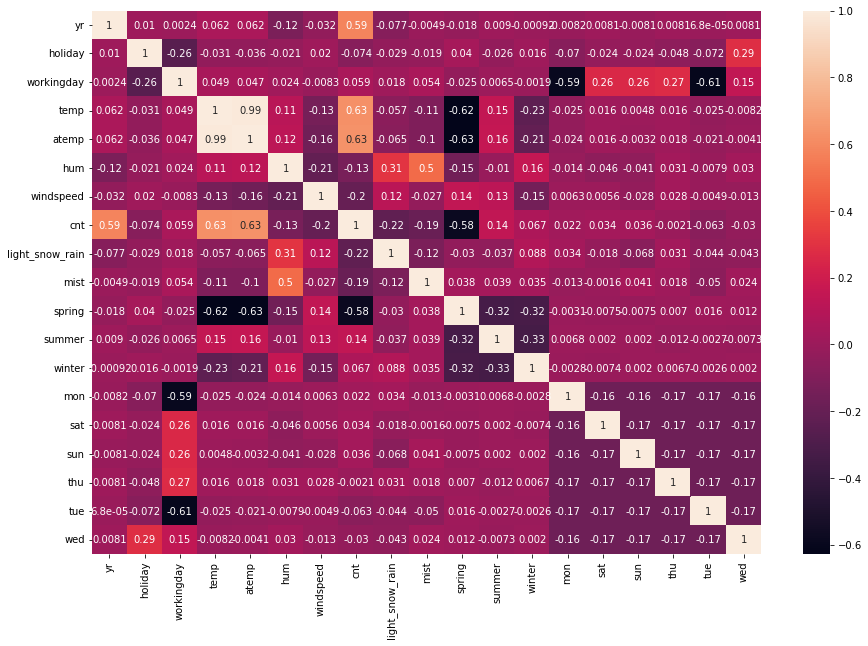

In [34]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(bike.corr(),annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

### 3.5 Create train and test sets (70:30)

In [35]:
# We specify random_state so that the train and test data set always have the same rows, respectively
bike_train, bike_test = train_test_split(bike,train_size=0.7,random_state=100)

In [36]:
print(bike_train.shape)
print(bike_test.shape)

(496, 19)
(213, 19)


In [37]:
bike_train[num_col]

,temp,atemp,hum,windspeed,cnt
358,11.266103,13.99805,68.1304,10.391097,754
421,11.445847,13.41540,41.0000,13.750343,3389
728,10.489153,11.58500,48.3333,23.500518,1796
477,13.188347,15.05625,76.6667,20.334232,3214
116,25.420000,28.75710,83.5417,20.917400,3872
...,...,...,...,...,...
594,27.811653,30.90355,60.3333,11.917089,7865
55,14.938268,17.52305,71.2174,23.218113,1461
357,12.402500,14.96210,54.2500,12.750368,1011
82,11.685000,13.54165,80.5833,16.333729,1865


### 3.6 Rescalling of numeric variables

It is extremely important to rescale the variables so that they have a comparable scale<br>
We are using Min-Max scaling

In [38]:
scaler = MinMaxScaler()

In [39]:
# We will do both fit and transform operation on trainig set
bike_train[num_col] = scaler.fit_transform(bike_train[num_col])
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,light_snow_rain,mist,spring,summer,winter,mon,sat,sun,thu,tue,wed
358,0,0,0,0.268714,0.268822,0.603017,0.383773,0.038996,0,0,1,0,0,0,0,0,0,1,0
421,1,0,0,0.274176,0.253229,0.220000,0.528775,0.357117,0,0,1,0,0,0,0,0,0,1,0
728,1,0,0,0.245101,0.204242,0.323529,0.949641,0.164795,0,0,1,0,0,0,0,0,0,1,0
477,1,0,1,0.327133,0.297143,0.723530,0.812968,0.335989,0,1,0,1,0,0,0,0,0,0,1
116,0,0,1,0.698871,0.663818,0.820589,0.838141,0.415429,0,1,0,1,0,0,0,0,0,0,0


## 4. Building the model

Dividing into X and Y sets for the model building

In [40]:
y_train = bike_train.pop('cnt')
X_train = bike_train

### 4.1 Automatic Selection using REF

We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [41]:
lm = LinearRegression()
lm.fit(X_train,y_train)

# Running RFE with the output number of the variable equal to 10
rfe = RFE(lm,10)
rfe = rfe.fit(X_train,y_train)

C:\Users\jayot\Anaconda3\lib\site-packages\sklearn\feature_selection\rfe.py:167: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  support_ = np.ones(n_features, dtype=np.bool)
C:\Users\jayot\Anaconda3\lib\site-packages\sklearn\feature_selection\rfe.py:168: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guid

In [42]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 2),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('light_snow_rain', True, 1),
 ('mist', True, 1),
 ('spring', True, 1),
 ('summer', False, 3),
 ('winter', True, 1),
 ('mon', True, 1),
 ('sat', False, 9),
 ('sun', False, 6),
 ('thu', False, 7),
 ('tue', False, 5),
 ('wed', False, 8)]

<font color='blue'>**Observation**</font> : We can see selected columns by RFE above where rfe.support_ variable is true with rfe ranking 

In [43]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'light_snow_rain',
       'mist', 'spring', 'winter', 'mon'],
      dtype='object')

In [44]:
X_train.columns[~rfe.support_]

Index(['holiday', 'atemp', 'summer', 'sat', 'sun', 'thu', 'tue', 'wed'], dtype='object')

Now we will only use columns selected by RFE for our model and build the model

In [45]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [46]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [47]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [48]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     253.2
Date:                Wed, 10 May 2023   Prob (F-statistic):          2.35e-185
Time:                        15:21:01   Log-Likelihood:                 466.52
No. Observations:                 496   AIC:                            -911.0
Df Residuals:                     485   BIC:                            -864.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1883      0.030     

<font color='blue'>**Observation**</font> : Our model is showing 83.9% R-Square value which is good and there are no significant p values to cater to

Now we will also check the VIF of the variable since we cannot just determine model based on p value alone

In [49]:
def check_vif(X_train_rfe,const):
    vif= pd.DataFrame()
    X = X_train_rfe.drop([const], axis=1)
    vif['features'] = X.columns
    vif['vif'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['vif'] = round(vif['vif'],2)
    vif = vif.sort_values(by = 'vif', ascending = True)
    return vif

check_vif(X_train_rfe,'const')

,features,vif
5,light_snow_rain,1.34
9,mon,1.63
8,winter,1.88
0,yr,2.07
7,spring,2.35
6,mist,2.38
1,workingday,4.45
4,windspeed,5.38
2,temp,10.95
3,hum,13.19


<font color='blue'>**Observation**</font> : We can see that |we have high 'hum' vif. So we will drop that column and check the model again. Our threshold is 5

### 4.2 Fine tune with manual removal of columns

We will only drop 1 column at a time since we know that VIF changes dramatically even if we drop 1 columns

In [50]:
X_train_rfe = X_train_rfe.drop(['hum'],axis=1)

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     278.0
Date:                Wed, 10 May 2023   Prob (F-statistic):          2.24e-185
Time:                        15:21:01   Log-Likelihood:                 463.65
No. Observations:                 496   AIC:                            -907.3
Df Residuals:                     486   BIC:                            -865.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1577      0.028     

In [51]:
check_vif(X_train_rfe,'const')

,features,vif
4,light_snow_rain,1.07
7,winter,1.43
5,mist,1.53
8,mon,1.63
6,spring,1.90
0,yr,2.05
1,workingday,4.42
3,windspeed,5.36
2,temp,5.71


<font color='blue'>**Observation**</font> : We can see that we have high vif for temp and windspeed. But we have observed that temp has better correlation with cnt than windspeed. Hence we will drop windspeed.

In [52]:
X_train_rfe = X_train_rfe.drop(['windspeed'],axis=1)

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     310.1
Date:                Wed, 10 May 2023   Prob (F-statistic):          1.08e-185
Time:                        15:21:01   Log-Likelihood:                 461.44
No. Observations:                 496   AIC:                            -904.9
Df Residuals:                     487   BIC:                            -867.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1299      0.024     

In [53]:
check_vif(X_train_rfe,'const')

,features,vif
3,light_snow_rain,1.05
6,winter,1.40
4,mist,1.52
5,spring,1.52
7,mon,1.59
0,yr,2.05
2,temp,4.21
1,workingday,4.25


<font color='blue'>**Observation**</font> : We can see that there is no significant drop in R-Square value and now VIF is also under 5 for all the variables. So we will proced with residual analysis of the model

## 5. Residual Analysis

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [54]:
# Predicting training data to calculate error
y_train_pred = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

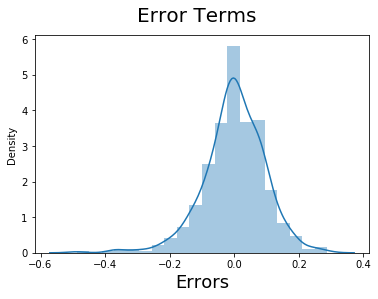

In [55]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Text(0, 0.5, 'y_train_pred')

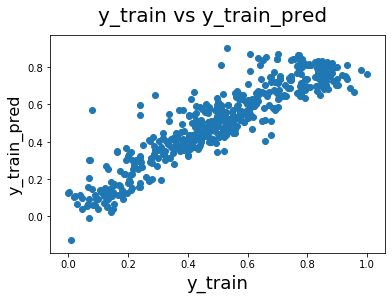

In [56]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_train,y_train_pred)
fig.suptitle('y_train vs y_train_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_train', fontsize=18)                          # X-label
plt.ylabel('y_train_pred', fontsize=16)                          # Y-labe

## 6. Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model

#### Applying the scaling on the test sets

In [57]:
# Observe that we are not using fit and transform. Instead we are using only transform
bike_test[num_col] = scaler.transform(bike_test[num_col])
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,light_snow_rain,mist,spring,summer,winter,mon,sat,sun,thu,tue,wed
585,1,0,1,0.868126,0.830239,0.517059,0.386691,0.827599,0,0,0,0,0,0,1,0,0,0,0
490,1,0,0,0.627223,0.625808,0.685882,0.368700,0.715683,0,1,0,1,0,0,0,0,0,1,0
629,1,0,0,0.736253,0.711117,0.554118,0.755379,0.961487,0,0,0,0,0,1,0,0,0,0,0
157,0,0,1,0.807900,0.771951,0.485294,0.478392,0.531450,0,0,0,1,0,0,0,0,1,0,0
582,1,0,1,0.863973,0.844608,0.564706,0.309340,0.794640,0,1,0,0,0,0,0,0,0,0,1


#### Dividing into X_test and y_test

In [58]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [59]:
# Now let's use our model to make predictions.
X = X_train_rfe.drop(['const'], axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
X_test_new.columns

Index(['const', 'yr', 'workingday', 'temp', 'light_snow_rain', 'mist',
       'spring', 'winter', 'mon'],
      dtype='object')

#### Making predictions

In [60]:
y_pred = lm.predict(X_test_new)

## 7. Model Evaluation

Text(0, 0.5, 'y_pred')

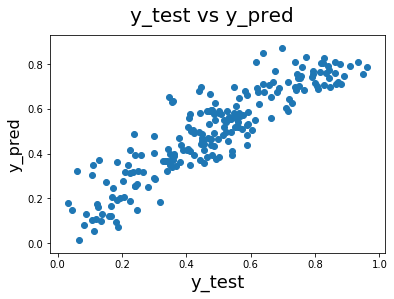

In [61]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-labe

We can see that the equation of our best fitted line is as follows

cnt = 0.2458 * yr + 0.0559 * workingday + 0.4574 * temp - 0.2679 * light_snow_rain - 0.0718 * mist - 0.1367 * spring + 0.0611 * winter + 0.0727 * mon